In [47]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as Patches

In [98]:
x0 = [1,1]
xf = [9,9]
map_size = [10, 10]
K = 100
step = 1

obs1 = Rectangle((3, 0), 4, 4, facecolor = 'red', fill=True)
obs2 = Rectangle((3, 4), 2, 2, facecolor = 'red', fill=True)
obs3 = Rectangle((3, 7), 4, 3, facecolor = 'red', fill=True)
obs4 = Rectangle((6, 5), 1, 2, facecolor = 'red', fill=True)
obs_vec = [obs1, obs2, obs3, obs4]

In [45]:
def random_sample():
    xrand = rn.uniform(0, map_size[0])
    yrand = rn.uniform(0, map_size[1])
    return [xrand, yrand]

In [69]:
def validate(qi, obs):
    # 1: In obstacle
    # 0: Outisde obstacle
    if obs.contains_point(qi):
        return 1
    else:
        return 0

In [87]:
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [75]:
def find_neighbor(qrand, V):
    distance_vec = []
    for Vi in V:
        distance_vec.append(distance(qrand, Vi))
    
    closest = distance_vec.index(min(distance_vec))
    return V[closest]

In [77]:
def extend(q0, q1):
    diff = [q1[0]-q0[0], q1[1]-q0[1]]
    norm_vec = diff/np.linalg.norm(diff)
    extension = step*[norm_vec[0], norm_vec[1]]
    return [q0[0] + extension[0],q0[1] + extension[1]]

In [89]:
k = 0
V_RRTCa = []
V_RRTCb = []
V_RRTCa.append(x0)
V_RRTCb.append(xf)

E_RRTCa = []
E_RRTCb = []

while 1:
    print('k: ', k)
    if np.mod(k, 2) == 0:
        V = V_RRTCa
        E = E_RRTCa
        Vother = V_RRTCb
    else:
        V = V_RRTCb
        E = E_RRTCb
        Vother = V_RRTCa
    
    # Sample
    while 1:
        qrand = random_sample()

        check_vec = []
        for obsi in obs_vec:
            check_vec.append(validate(qrand, obsi))
        # If all sum is 0, valid
        if np.sum(check_vec) == 0:
            qneighbor = find_neighbor(qrand, V)
            qnew = extend(qneighbor, qrand)
            break
    
    # Add to V, E
    V.append(qnew)
    E.append([qneighbor, qnew])
    k += 1

    # Check distance
    dist_check = []
    if np.abs(distance(V[-1], Vother[-1])) <= step:
        dist_check.append(1)
    else:
        dist_check.append(0)
    if np.sum(dist_check) > 0 or k > K:
        E.append([V[-1], Vother[-1]])
        break

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41


(0.0, 10.0)

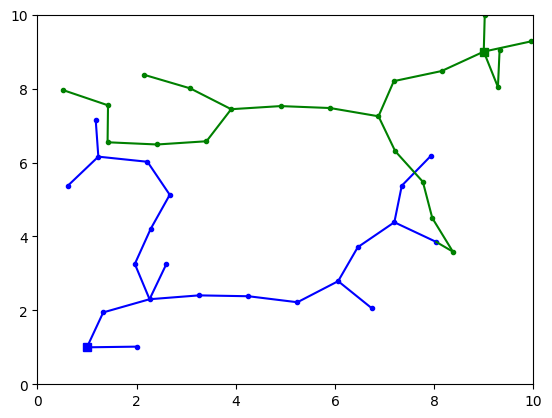

In [104]:
fig = plt.figure()
ax = fig.subplots()

# Obstacle
"""obs1 = Rectangle((3, 0), 4, 4, facecolor = 'red', fill=True)
obs2 = Rectangle((3, 4), 2, 2, facecolor = 'red', fill=True)
obs3 = Rectangle((3, 7), 4, 3, facecolor = 'red', fill=True)
obs4 = Rectangle((6, 5), 1, 2, facecolor = 'red', fill=True)
ax.add_patch(obs1)
ax.add_patch(obs2)
ax.add_patch(obs3)
ax.add_patch(obs4)"""

# Plot Path
for Va in V_RRTCa:
    plt.plot(Va[0], Va[1], '.b')
for Vb in V_RRTCb:
    plt.plot(Vb[0], Vb[1], '.g')
for Ea in E_RRTCa:
    plt.plot([Ea[0][0], Ea[1][0]], [Ea[0][1], Ea[1][1]], '-b')
for Eb in E_RRTCb:
    plt.plot([Eb[0][0], Eb[1][0]], [Eb[0][1], Eb[1][1]], '-g')

# Points
plt.plot(x0[0], x0[1], 'sb')
plt.plot(xf[0], xf[1], 'sg')

# Map Limit
plt.xlim(0, map_size[0])
plt.ylim(0, map_size[1])